# Introducción

Este es el primero de varios talleres introductorios al procesamiento y limpieza de datos. En este estaremos usando como ambiente de trabajo a **Jupyter**, que permite crear documentos con código y prosa, además de almacenar resultados de las operaciones ejecutadas (cálculos, graficas, etc). Jupyter permite interactuar con varios lenguajes de programación, en este, usaremos **Python**, un lenguaje de programación bastante simple y poderoso, con acceso a una gran variedad de librerias para procesamiento de datos. Entre estas, está **Pandas**, una libreria que nos da acceso a estructuras de datos muy poderosas para manipular datos.

¡Comenzemos entonces! 

## Instalación

Para poder ejecutar este *Notebook*, necesitas tener instalado Python 3, el cual corre en todos los sistemas operativos actuales, sin embargo, para instalar las dependencias: Pandas y Jupyter.

### Modo Sencillo

Recomiendo utilizar la distribución Anaconda https://www.continuum.io/downloads en su version para Python 3, esta incluye instalado Jupyter, Pandas, Numpy y Scipy, y mucho otro software útil. Sigue las instrucciones en la documentacion de Anaconda para configurar un ambiente de desarollo con Jupyter.
https://docs.continuum.io/anaconda/navigator/getting-started.html

### Linux y otros

Te recomiendo utilizar Python 3.6 o superior, instalar la version mas reciente posible de virtualenv y pip, crear un nuevo entorno de desarollo y ahi instalar las dependencias necesarias.


    $ virtualenv venv/
$ source venv/bin/activate
    $ pip install -r requirements.txt
    



# Primeros pasos

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
pd.set_option('precision', 5)

Populating the interactive namespace from numpy and matplotlib


Con estos comandos, cargamos a nuestro entorno de trabajo las librerias necesarias.

En este paso, utilizando la funcion ```read_csv``` cargamos los datos. Esto crea un ```DataFrame```, una unidad de datos en Pandas, que nos da mucha funcionalidad y tiene bastantes propiedades convenientes para el análisis.

In [2]:
muni_data = pd.read_csv("GUATEMALA MUNICIPAL 2008-2011.csv", 
                        sep=";")

/home/tian/OPENDATA/MUNICIPALIDADES/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## DataFrames y más

Aqui podemos ver el dataframe que creamos.
En Pandas, los DataFrames son unidades básicas, junto con las Series.

Veamos una serie muy sencilla antes de pasar a evaluar ```muni_data```, el DataFrame que acabamos de crear. Crearemos una serie de numeros aleatorios, y usaremos funciones estadisticas para analizarlo.

0    1.60332
1   -1.10926
2   -0.25966
3   -1.92042
4    0.12167
Name: prueba, dtype: float64
count    5.00000
mean    -0.31287
std      1.33059
min     -1.92042
25%     -1.10926
50%     -0.25966
75%      0.12167
max      1.60332
Name: prueba, dtype: float64


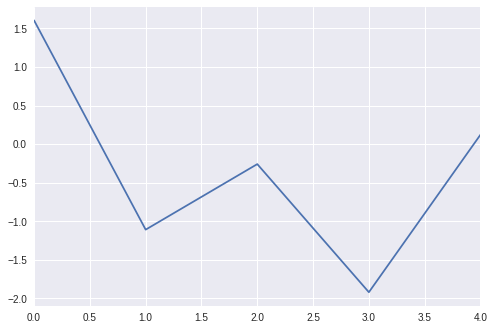

In [3]:
serie_prueba_s = pd.Series(np.random.randn(5), name='prueba')

print(serie_prueba_s)

print(serie_prueba_s.describe())

serie_prueba_s.plot()

Con esto podemos ver ya unas propiedades muy interesantes. Las series están basadas en el concepto estadistico, pero incluyen un título (del eje), un índice (el cual identifica a los elementos) y el dato en sí, que puede ser numerico (float), string unicode (texto) u otro tipo de dato.

Las series estan basadas tambien en conceptos de vectores, asi que se pueden realizar operaciones vectoriales en las cuales implicitamente se alinean los indíces, esto es muy util por ejemplo para restar dos columnas, sin importar el tamaño de ambas, automaticamente Pandas unirá inteligentemente ambas series. Puedes tambien obtener elementos de las series por su valor de índice, o por un rango, usando la notación usual en Python. Como nota final, las Series comparten mucho del comportamiento de los NumPy Arrays, haciendolos instantaneamente compatibles con muchas librerias y recursos. https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

In [4]:
serie_prueba_d = pd.Series(np.random.randn(5), name='prueba 2')

print(serie_prueba_d)

print(serie_prueba_d[0:3]) # Solo los elementos del 0 al 3

# Esto funciona porque ambas series tienen indices en común.
# Si sumamos dos con tamaños distintos, los espacios vacios son marcados como NaN
serie_prueba_y = serie_prueba_d + (serie_prueba_s * 2)
print(serie_prueba_y)
print("La suma de la serie y es: {suma}".format(suma=serie_prueba_y.sum()))

0   -0.52017
1   -1.30160
2   -0.32900
3    0.38096
4   -0.10432
Name: prueba 2, dtype: float64
0   -0.52017
1   -1.30160
2   -0.32900
Name: prueba 2, dtype: float64
0    2.68646
1   -3.52011
2   -0.84831
3   -3.45989
4    0.13901
dtype: float64
La suma de la serie y es: -5.002840875252394


Pasemos ahora a DataFrames, como nuestro muni_data DataFrame. Los DataFrames son estructuras bi-dimensionales de datos. Son muy usadas porque proveen una abstracción similar a una hoja de calculo o a una tabla de SQL. Los DataFrame tienen índices (etiquetas de fila) y columnas, ambos ejes deben encajar, y el resto será llenado de datos no validos.

Por ejemplo podemos unir ambas series y crear un DataFrame nuevo, usando un diccionario de Python, por ejemplo. Tambien podemos graficar los resultados.

      col1     col2  col3
0  1.60332 -0.52017     1
1 -1.10926 -1.30160     2
2 -0.25966 -0.32900     3
3 -1.92042  0.38096     4
4  0.12167 -0.10432     0
La suma de cada columna es: 
col1    -1.56435
col2    -1.87413
col3    10.00000
dtype: float64


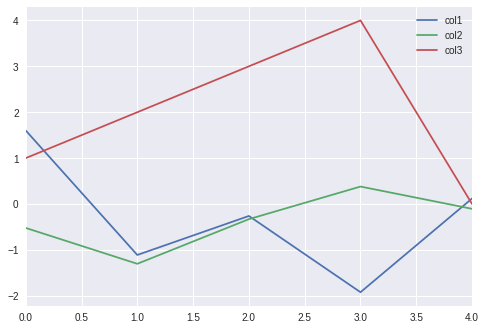

In [5]:
prueba_dict ={
                        "col1": serie_prueba_s,
                        "col2": serie_prueba_d,
                        "col3": [1, 2, 3, 4, 0]
             }
prueba_data_frame = pd.DataFrame(prueba_dict)
print(prueba_data_frame)
# La operacion .sum() ahora retorna un DataFrame, pero Pandas sabe no combinar peras con manzanas.
print("La suma de cada columna es: \n{suma}".format(suma=prueba_data_frame.sum())) 
prueba_data_frame.plot()

Veamos ahora ya, nuestro DataFrame creado con los datos, muni_data.

In [6]:
muni_data

,ANNO,ADMINISTRACIÓN,MUNICIPIO,DEPTO,MUN,FUNC1,FUNC2,FUNC3,ECON1,ECON2,...,ORIGEN2,ORIGEN3,PROGRAMA1,PROGRAMA2,PROYECTO1,PROYECTO2,APROBADO,RETRASADO,EJECUTADO,PAGADO
0,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,"Q.137,400.00","Q.137,400.00","Q.137,400.00"
1,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
2,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
3,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,"Q.240,000.00","Q.49,588.00","Q.49,588.00","Q.49,588.00"
4,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
5,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,"Q.16,000.00","Q.16,000.00","Q.16,000.00"
6,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,015 - Complementos Específicos Al Personal Per...,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,"Q.1,750.00","Q.1,500.00","Q.1,500.00"
7,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,015 - Complementos Específicos Al Personal Per...,...,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,"Q.26,000.00","Q.2,750.00","Q.2,750.00","Q.2,750.00"
8,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,015 - Complementos Específicos Al Personal Per...,...,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.250.00,Q.250.00,Q.250.00
9,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,015 - Complementos Específicos Al Personal Per...,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-


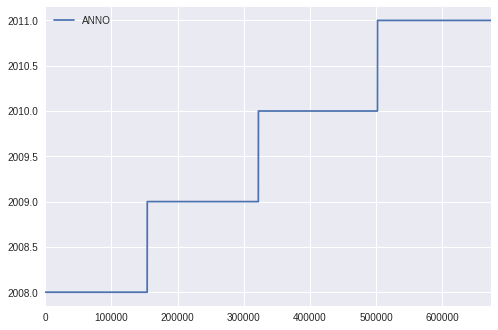

In [7]:
muni_data.plot()

In [8]:
muni_data.head(5)

,ANNO,ADMINISTRACIÓN,MUNICIPIO,DEPTO,MUN,FUNC1,FUNC2,FUNC3,ECON1,ECON2,...,ORIGEN2,ORIGEN3,PROGRAMA1,PROGRAMA2,PROYECTO1,PROYECTO2,APROBADO,RETRASADO,EJECUTADO,PAGADO
0,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,"Q.137,400.00","Q.137,400.00","Q.137,400.00"
1,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
2,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-
3,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,"Q.240,000.00","Q.49,588.00","Q.49,588.00","Q.49,588.00"
4,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Q.-,Q.-,Q.-,Q.-


In [9]:
muni_data['APROBADO'].head()

0            Q.-   
1            Q.-   
2            Q.-   
3     Q.240,000.00 
4            Q.-   
Name: APROBADO, dtype: object

In [10]:
muni_data.columns

Index(['ANNO', 'ADMINISTRACIÓN', 'MUNICIPIO', 'DEPTO', 'MUN', 'FUNC1', 'FUNC2',
       'FUNC3', 'ECON1', 'ECON2', 'ORIGEN1', 'ORIGEN2', 'ORIGEN3', 'PROGRAMA1',
       'PROGRAMA2', 'PROYECTO1', 'PROYECTO2', 'APROBADO', 'RETRASADO',
       'EJECUTADO', 'PAGADO'],
      dtype='object')

In [11]:
muni_data['MUNICIPIO'].unique()[:5] # Los primeros 5 municipios

array(['ALOTENANGO', 'AMATITLAN', 'ATESCATEMPA', 'AYUTLA', 'CABAÑAS'], dtype=object)

In [12]:
print("Funcion 1: \n {func1} \n Funcion 2: \n {func2} \n Funcion 3: \n{func3}".format(
        func1=muni_data["FUNC1"].unique(), 
        func2=muni_data["FUNC2"].unique(),
        func3=muni_data["FUNC3"].unique()
        )
     )

Funcion 1: 
 ['1 - ADMINISTRACION GENERAL' '3 - SERVICIOS SOCIALES'
 '2 - DEFENSA Y SEGURIDAD INTERNA' 'Sin Finalidad'
 '4 - SERVICIOS ECONOMICOS' '5 - DEUDA PUBLICA'
 '6 - OTROS NO CLASIFICABLES' '01 - SERVICIOS PUBLICOS GENERALES'
 '08 - SALUD' '07 - URBANIZACION Y SERVICIOS COMUNITARIOS'
 '05 - ASUNTOS ECONOMICOS' '06 - PROTECCION AMBIENTAL' '10 - EDUCACION'
 '12 - TRANSACCIONES DE LA DEUDA PUBLICA'
 '03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA'
 '09 - ACTIVIDADES DEPORTIVAS, RECREATIVAS, CULTURA Y RELIGION'
 '11 - PROTECCION SOCIAL' '04 - ATENCION A DESASTRES Y GESTION DE RIESGOS'
 '02 - DEFENSA'] 
 Funcion 2: 
 ['109 - OTRAS ACTIVIDADES DE ADMINISTRACION' '306-AGUA Y SANEAMIENTO'
 '309-MEDIO AMBIENTE' '303-EDUCACION' '202-SEGURIDAD INTERNA'
 '304-CULTURA Y DEPORTES' '301-SALUD Y ASISTENCIA SOCIAL' 'Sin Funcion'
 '404-TRANSPORTE' '405-INDUSTRIA  Y  COMERCIO'
 '409-OTRAS ACTIVIDADES DE SERVICIOS ECONOMICOS'
 '106-ADMINISTRACION FISCAL' '406-TURISMO'
 '310-OTRAS ACTIVIDADES DE SERVICIOS

Vamos a explorar un poco con indices y etiquetas:

In [13]:
index_geo_data = muni_data.set_index("DEPTO","MUNICIPIO").sort_index()

In [14]:
index_geo_data.loc[
                    ["GUATEMALA","ESCUINTLA","SACATEPEQUEZ"],
                    ['FUNC1','FUNC2','FUNC3','APROBADO','EJECUTADO']
                  ].head()

,FUNC1,FUNC2,FUNC3,APROBADO,EJECUTADO
DEPTO,,,,,
GUATEMALA,01 - SERVICIOS PUBLICOS GENERALES,"0101 - Administracion legislative, ejecutiva y...",010102-Ejecutiva,"Q.34,180.00",NaN
GUATEMALA,01 - SERVICIOS PUBLICOS GENERALES,"0101 - Administracion legislative, ejecutiva y...",010102-Ejecutiva,"Q.42,000.00",NaN
GUATEMALA,01 - SERVICIOS PUBLICOS GENERALES,"0101 - Administracion legislative, ejecutiva y...",010102-Ejecutiva,"Q.42,000.00",NaN
GUATEMALA,01 - SERVICIOS PUBLICOS GENERALES,"0101 - Administracion legislative, ejecutiva y...",010102-Ejecutiva,"Q.320,000.00",NaN
GUATEMALA,01 - SERVICIOS PUBLICOS GENERALES,"0101 - Administracion legislative, ejecutiva y...",010102-Ejecutiva,"Q.1,000.00",NaN


Ahora que podemos realizar selección basica, pensamos, que podemos hacer con estos datos, y nos enfrentamos a un problema...

In [15]:
muni_data['APROBADO'][3] * 2

' Q.240,000.00  Q.240,000.00 '

*¡Rayos!* porque no puedo manipular estos datos así como los otros, y es porque son de tipo texto y no números.

In [16]:
# muni_data['APROBADO'].sum() ## No correr, falla...

Necesitamos crear una funcion para limpiar estos tipos de dato que son texto, para poderlos convertir a numeros de tipo punto flotante (decimales).

In [17]:
def clean_q(input_object):
    from re import sub
    if input_object == NaN:
        return 0
    inp = unicode(input_object) # De objeto a un texto
    cleansed_q = sub(r'Q\.','', inp) # Remueve Q., el slash evita que . sea interpretado como un caracter especial
    cleansed_00 = sub(r'\.00', '', cleansed_q) # Igual aqui
    cleansed_comma = sub(',', '', cleansed_00)
    cleansed_dash = sub('-', '', cleansed_comma)
    cleansed_nonchar = sub(r'[^0-9]+', '', cleansed_dash)
    if cleansed_nonchar == '':
        return 0
    return cleansed_nonchar

In [18]:
presupuesto_aprobado = muni_data['APROBADO'].map(clean_q).astype(float)
presupuesto_retrasado = muni_data['RETRASADO'].map(clean_q).astype(float)
presupuesto_ejecutado = muni_data['EJECUTADO'].map(clean_q).astype(float)
presupuesto_pagado = muni_data['PAGADO'].map(clean_q).astype(float)

In [19]:
presupuesto_aprobado.describe()

count    6.74135e+05
mean     3.64625e+05
std      8.43016e+06
min      0.00000e+00
25%      0.00000e+00
50%      1.00000e+03
75%      1.50000e+04
max      1.43719e+09
Name: APROBADO, dtype: float64

In [20]:
muni_data['EJECUTADO'].head()

0     Q.137,400.00 
1            Q.-   
2            Q.-   
3      Q.49,588.00 
4            Q.-   
Name: EJECUTADO, dtype: object

In [21]:
presupuesto_ejecutado.head()

0    137400.0
1         0.0
2         0.0
3     49588.0
4         0.0
Name: EJECUTADO, dtype: float64

In [22]:
muni_data['FUNC1'].str.upper().value_counts()

1 - ADMINISTRACION GENERAL                                      150541
01 - SERVICIOS PUBLICOS GENERALES                               107911
SIN FINALIDAD                                                   100862
3 - SERVICIOS SOCIALES                                           96451
4 - SERVICIOS ECONOMICOS                                         65763
07 - URBANIZACION Y SERVICIOS COMUNITARIOS                       40349
05 - ASUNTOS ECONOMICOS                                          38126
10 - EDUCACION                                                   18584
06 - PROTECCION AMBIENTAL                                        17359
09 - ACTIVIDADES DEPORTIVAS, RECREATIVAS, CULTURA Y RELIGION     11929
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA                          7137
08 - SALUD                                                        5707
12 - TRANSACCIONES DE LA DEUDA PUBLICA                            3470
11 - PROTECCION SOCIAL                                            3338
6 - OT

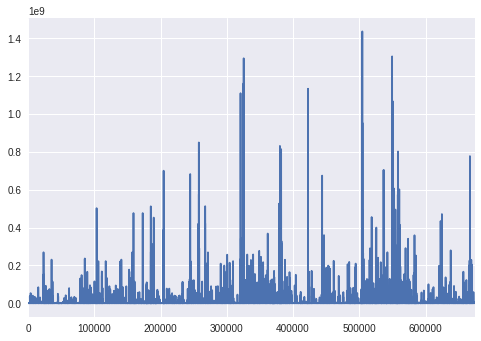

In [23]:
presupuesto_aprobado.plot()

In [24]:
presupuesto_ejecutado.describe()

count    6.74135e+05
mean     1.32938e+06
std      4.39739e+07
min      0.00000e+00
25%      0.00000e+00
50%      0.00000e+00
75%      5.59100e+03
max      2.54294e+10
Name: EJECUTADO, dtype: float64

Bueno, ahora ya tenemos estas series de datos convertidas. ¿como las volvemos a agregar al dataset? ¡Facil! lo volvemos a insertar al DataFrame original, sobreescribiendo esa columna.

In [25]:
muni_data['APROBADO'] = presupuesto_aprobado
muni_data['RETRASADO'] = presupuesto_retrasado
muni_data['EJECUTADO'] = presupuesto_ejecutado
muni_data['PAGADO'] = presupuesto_pagado

In [26]:
muni_data['APROBADO'].sum()

245806713741.0

In [27]:
muni_data.head()

,ANNO,ADMINISTRACIÓN,MUNICIPIO,DEPTO,MUN,FUNC1,FUNC2,FUNC3,ECON1,ECON2,...,ORIGEN2,ORIGEN3,PROGRAMA1,PROGRAMA2,PROYECTO1,PROYECTO2,APROBADO,RETRASADO,EJECUTADO,PAGADO
0,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,137400.0,137400.0,137400.0
1,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0
2,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0
3,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,240000.0,49588.0,49588.0,49588.0
4,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,...,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0


In [28]:
muni_data['ECON1'].unique()

array(['21 Gastos Corrientes', '22 Gastos de Capital',
       '23 Aplicaciones Financieras'], dtype=object)

Ahora si, ¡ya podemos agrupar y hacer indices bien!

In [29]:
index_geo_data = muni_data.set_index("DEPTO","MUNICIPIO").sort_index()

In [30]:
mi_muni_d = muni_data.set_index(["ANNO"],["DEPTO","MUNICIPIO"],["FUNC1","ECON1","ORIGEN1"]).sort_index()

In [31]:
mi_muni_d.head()

,,ADMINISTRACIÓN,MUNICIPIO,DEPTO,MUN,FUNC1,FUNC2,FUNC3,ECON1,ECON2,ORIGEN1,ORIGEN2,ORIGEN3,PROGRAMA1,PROGRAMA2,PROYECTO1,PROYECTO2,APROBADO,RETRASADO,EJECUTADO,PAGADO
,ANNO,,,,,,,,,,,,,,,,,,,,
0,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,20 Recursos Del Tesoro Con Afectación Especifica,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,137400.0,137400.0,137400.0
1,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,20 Recursos Del Tesoro Con Afectación Especifica,21 Ingresos Tributarios Iva Paz,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0
2,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,20 Recursos Del Tesoro Con Afectación Especifica,22 Ingresos Ordinarios De Aporte Constitucional,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0
3,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,30 Recursos Propios De Las Instituciones,31 Ingresos Propios,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,240000.0,49588.0,49588.0,49588.0
4,2008,Municipal,ALOTENANGO,SACATEPEQUEZ,ALOTENANGO,1 - ADMINISTRACION GENERAL,109 - OTRAS ACTIVIDADES DE ADMINISTRACION,Sin Division,21 Gastos Corrientes,011 - Personal Permanente,40 Credito Interno,42 Préstamos Internos,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,0.0,0.0,0.0,0.0


In [32]:
help(mi_muni_d)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, d

In [33]:
mi_muni_d.columns

Index(['ADMINISTRACIÓN', 'MUNICIPIO', 'DEPTO', 'MUN', 'FUNC1', 'FUNC2',
       'FUNC3', 'ECON1', 'ECON2', 'ORIGEN1', 'ORIGEN2', 'ORIGEN3', 'PROGRAMA1',
       'PROGRAMA2', 'PROYECTO1', 'PROYECTO2', 'APROBADO', 'RETRASADO',
       'EJECUTADO', 'PAGADO'],
      dtype='object')

In [34]:
mi_muni_d["DEPTO"].describe()

count        674135
unique           22
top       GUATEMALA
freq          55520
Name: DEPTO, dtype: object

In [35]:
year_grouped = mi_muni_d.groupby("ANNO").sum()

In [36]:
year_grouped

,APROBADO,RETRASADO,EJECUTADO,PAGADO
ANNO,,,,
2008,2.68353e+10,2.45634e+11,4.14921e+11,4.12270e+11
2009,5.31561e+10,2.99390e+11,4.81259e+11,4.77409e+11
2010,7.32193e+10,3.28068e+11,0.00000e+00,5.26614e+11
2011,9.25959e+10,3.39514e+11,0.00000e+00,5.42302e+11


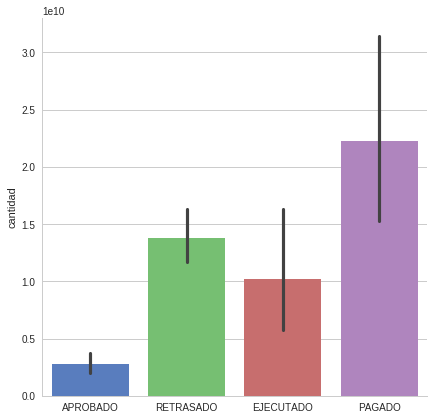

In [37]:
year_dep_grouped = mi_muni_d.groupby(["ANNO","DEPTO"]).sum()
year_dep_grouped.head()

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot( data=year_dep_grouped,
                   size=6, kind="bar", palette="muted")
# g.despine(left=True)
g.set_ylabels("cantidad")

In [38]:
year_dep_grouped.head()


APROBADO    RETRASADO    EJECUTADO       PAGADO
ANNO DEPTO                                                            
2008 ALTA VERAPAZ   2.78291e+09  1.46371e+10  1.63018e+10  1.61846e+10
     BAJA VERAPAZ   6.13609e+08  6.77458e+09  6.57817e+09  6.56299e+09
     CHIMALTENANGO  9.42927e+08  8.63124e+09  1.30331e+10  1.30252e+10
     CHIQUIMULA     5.74758e+08  7.30016e+09  7.62139e+09  7.59232e+09
     EL PROGRESO    3.53643e+08  5.29144e+09  7.06977e+09  7.03881e+09

## Contestando preguntas
Ahora ya podemos contestar algunas clases de preguntas agrupando estas entradas individuales de de datos.
¿Que tal el departamento que tiene mas gasto en Seguridad? ¿Los tipos de gasto mas elevados como suelen ser pagados?

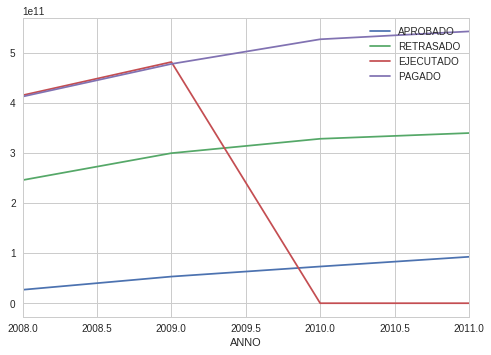

In [39]:
year_grouped.plot()

In [42]:
year_dep_group = mi_muni_d.groupby(["DEPTO","ANNO"]).sum()

In [51]:
year_dep_group.unstack().head()

APROBADO                                         \
ANNO                  2008         2009         2010         2011   
DEPTO                                                               
ALTA VERAPAZ   2.78291e+09  5.64744e+09  1.95357e+10  2.12952e+10   
BAJA VERAPAZ   6.13609e+08  1.93412e+09  1.55609e+09  3.10721e+09   
CHIMALTENANGO  9.42927e+08  2.36969e+09  2.95906e+09  2.63505e+09   
CHIQUIMULA     5.74758e+08  7.94670e+08  2.40722e+09  3.12491e+09   
EL PROGRESO    3.53643e+08  9.42015e+08  1.98337e+09  2.09171e+09   

                 RETRASADO                                         \
ANNO                  2008         2009         2010         2011   
DEPTO                                                               
ALTA VERAPAZ   1.46371e+10  2.09176e+10  3.22332e+10  3.77961e+10   
BAJA VERAPAZ   6.77458e+09  7.40240e+09  9.37046e+09  1.15378e+10   
CHIMALTENANGO  8.63124e+09  9.65804e+09  9.83285e+09  8.07592e+09   
CHIQUIMULA     7.30016e+09  7.01026e+09  9.74311e+09  8.95407e+09   
EL PROGRESO    5.29144e+09  6.41684e+09  6.02155e+09  6.51524e+09   

                 EJECUTADO                              PAGADO               \
ANNO                  2008         2009 2010 2011         2008         2009   
DEPTO                                                                         
ALTA VERAPAZ   1.63018e+10  2.18337e+10  0.0  0.0  1.61846e+10  2.15977e+10   
BAJA VERAPAZ   6.57817e+09  7.00557e+09  0.0  0.0  6.56299e+09  6.97541e+09   
CHIMALTENANGO  1.30331e+10  1.19265e+10  0.0  0.0  1.30252e+10  1.17757e+10   
CHIQUIMULA     7.62139e+09  7.77514e+09  0.0  0.0  7.59232e+09  7.68196e+09   
EL PROGRESO    7.06977e+09  7.01621e+09  0.0  0.0  7.03881e+09  6.94013e+09   

                                         
ANNO                  2010         2011  
DEPTO                                    
ALTA VERAPAZ   2.06492e+10  2.38565e+10  
BAJA VERAPAZ   8.10811e+09  1.04986e+10  
CHIMALTENANGO  1.27430e+10  1.25867e+10  
CHIQUIMULA     9.47250e+09  9.48921e+09  
EL PROGRESO    8.77785e+09  8.27554e+09

In [44]:
func_p = mi_muni_d.groupby(["FUNC1"]).sum()
func_dep = mi_muni_d.groupby(["FUNC1","DEPTO"]).sum()
func_p

,APROBADO,RETRASADO,EJECUTADO,PAGADO
FUNC1,,,,
01 - SERVICIOS PUBLICOS GENERALES,2.12896e+10,9.39864e+10,0.00000e+00,1.46451e+11
02 - DEFENSA,7.65149e+06,4.85768e+07,0.00000e+00,1.15252e+08
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA,1.54112e+09,4.62692e+09,0.00000e+00,9.71618e+09
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS,2.02693e+08,1.46343e+09,0.00000e+00,1.90633e+09
05 - ASUNTOS ECONOMICOS,3.53597e+10,1.16573e+11,0.00000e+00,1.08795e+11
06 - PROTECCION AMBIENTAL,6.82913e+09,2.43591e+10,0.00000e+00,3.15289e+10
07 - URBANIZACION Y SERVICIOS COMUNITARIOS,2.35510e+10,9.90229e+10,0.00000e+00,1.12771e+11
08 - SALUD,1.79933e+09,6.12886e+09,0.00000e+00,7.90331e+09
"09 - ACTIVIDADES DEPORTIVAS, RECREATIVAS, CULTURA Y RELIGION",2.02757e+09,1.08670e+10,0.00000e+00,1.33765e+10


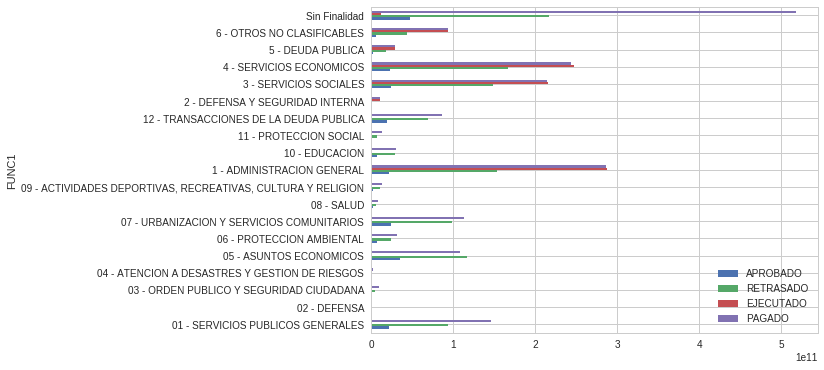

In [77]:
func_p.plot(kind="barh", figsize=(8,6), linewidth=2.5)

In [48]:
func_dep_flat = func_dep.unstack()

In [52]:
func_dep_flat.head()

APROBADO               \
DEPTO                                          ALTA VERAPAZ BAJA VERAPAZ   
FUNC1                                                                      
01 - SERVICIOS PUBLICOS GENERALES               2.65028e+09  5.44695e+08   
02 - DEFENSA                                    0.00000e+00  4.18211e+06   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA        4.15592e+08  2.73807e+06   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS  1.65910e+06  1.21105e+06   
05 - ASUNTOS ECONOMICOS                         2.18998e+10  9.96920e+08   

                                                                           \
DEPTO                                          CHIMALTENANGO   CHIQUIMULA   
FUNC1                                                                       
01 - SERVICIOS PUBLICOS GENERALES                6.02520e+08  1.45687e+09   
02 - DEFENSA                                             NaN  1.25551e+06   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA         1.73070e+07  1.20563e+08   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS   1.55504e+06  1.00000e+05   
05 - ASUNTOS ECONOMICOS                          8.61639e+08  5.23307e+08   

                                                                          \
DEPTO                                           EL PROGRESO    ESCUINTLA   
FUNC1                                                                      
01 - SERVICIOS PUBLICOS GENERALES               5.06434e+08  1.82266e+09   
02 - DEFENSA                                            NaN  8.25311e+05   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA        3.46200e+05  8.40011e+06   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS  0.00000e+00  1.09773e+08   
05 - ASUNTOS ECONOMICOS                         7.35246e+07  1.12597e+09   

                                                                           \
DEPTO                                             GUATEMALA HUEHUETENANGO   
FUNC1                                                                       
01 - SERVICIOS PUBLICOS GENERALES               4.99280e+09   1.26883e+09   
02 - DEFENSA                                    0.00000e+00           NaN   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA        7.54022e+07   8.85087e+07   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS  1.60380e+07   7.50000e+04   
05 - ASUNTOS ECONOMICOS                         6.27814e+08   3.92554e+09   

                                                                          \
DEPTO                                                IZABAL       JALAPA   
FUNC1                                                                      
01 - SERVICIOS PUBLICOS GENERALES               1.95440e+08  4.06992e+08   
02 - DEFENSA                                            NaN  5.80000e+05   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA        1.34582e+06  4.66579e+07   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS  8.19824e+05  1.25000e+05   
05 - ASUNTOS ECONOMICOS                         4.30563e+08  9.99355e+07   

                                                   ...              PAGADO  \
DEPTO                                              ...      QUETZALTENANGO   
FUNC1                                              ...                       
01 - SERVICIOS PUBLICOS GENERALES                  ...         5.56908e+09   
02 - DEFENSA                                       ...         6.50000e+01   
03 - ORDEN PUBLICO Y SEGURIDAD CIUDADANA           ...         1.11593e+09   
04 - ATENCION A DESASTRES Y GESTION DE RIESGOS     ...         3.74758e+06   
05 - ASUNTOS ECONOMICOS                            ...         9.02544e+09   

                                                                          \
DEPTO                                                QUICHE   RETALHULEU   
FUNC1                                                                      
01 - SERVICIOS PUBLICOS GENERALES               3.55170e+09  3.88756e+09   
02 - DEFENSA                                    4.45000e+04  